# Week 7 : Case Study 3 - Bimal H M

## Python Analysis on Add_Sales Dataset

### STEP 1 : Importing all Necessary Libraries in to Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### STEP 2 : Reading the Dataset in to Notebook

In [2]:
data = pd.read_csv('Add_sales_data_2018.csv')

### STEP 3 : Displaying the Dataset

#### A) Displaying Dataset Info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


#### B) Displaying First few Rows

In [4]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


### Q1 : First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

#### A) Direct Calculation of Correlation.

In [5]:
data.corr(method ='pearson')['Profit(in Thousands)']

Add1(in Thousands)      0.991975
Add2(in Thousands)      0.999145
Add3(in Thousands)      0.993389
Add4(in Thousands)      0.993346
Add5(in Thousands)      0.993710
Profit(in Thousands)    1.000000
Name: Profit(in Thousands), dtype: float64

#### B) Through Heatmap

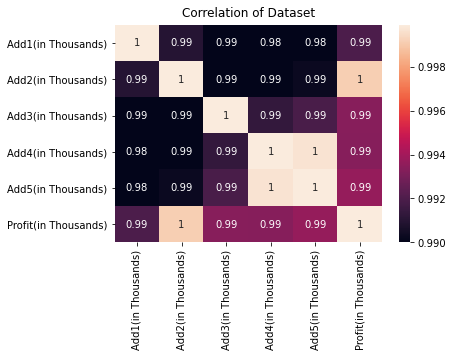

In [6]:
HM = sns.heatmap(data.corr(),vmin = 0.9900, vmax = 0.9999,annot = True)
HM.set_title("Correlation of Dataset",y = 1.01)
plt.show()

##### From Heatmap it is clear that there is a Strong Positive Correlation between between the amount spent for advertising through five different companies and profit generated

### Q2 : Build a regression model to predict the profit from the given data and comment your findings on it.

##### From heat map it is clear that Add2 and Profit have Strong Positive correlation and Add4 and Add 5 have Strong Posivite correlation, so we can remove Add2 and Add 5.

In [7]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [8]:
data1 = data.drop(['Add2(in Thousands)','Add5(in Thousands)','Date'],axis = 1)

In [9]:
data1.columns

Index(['Add1(in Thousands)', 'Add3(in Thousands)', 'Add4(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [10]:
y = data1['Profit(in Thousands)']
x = data1.drop(['Profit(in Thousands)'],axis = 1)

In [11]:
x.shape

(205, 3)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=26,test_size=.2)

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [14]:
model = lr.fit(x_train,y_train)

In [15]:
y_pred = model.predict(x_test)

In [16]:
print(y_test)

71     4916.064
25     4436.321
60     5145.131
108    5580.775
124    5244.097
111    5491.792
34     4461.325
87     5058.140
90     4887.296
190    5917.925
155    5078.636
164    4997.719
167    5465.277
107    5452.280
80     5043.705
172    5789.791
189    5938.474
131    4968.030
42     4432.864
125    5153.977
21     4390.996
30     4598.292
141    5245.324
201    5439.655
138    5247.011
93     4705.198
129    5140.372
153    5019.997
67     5001.615
137    5051.755
66     5038.222
50     4548.110
109    5577.150
1      4042.448
88     4937.030
26     4451.999
122    5167.878
20     4178.008
187    5890.012
191    5780.799
116    5395.217
Name: Profit(in Thousands), dtype: float64


In [17]:
print(y_pred)

[4922.03495982 4438.41477729 5143.78329855 5575.43855864 5218.29192588
 5514.6122738  4479.75618619 5071.62709738 4881.41825175 5894.22473099
 5028.43868364 4970.43374367 5477.48600223 5470.28775933 5003.53893939
 5756.49375536 5955.71310511 4996.36062967 4433.88757001 5177.19988019
 4371.94520691 4619.41081506 5259.30648546 5429.91091063 5228.87825099
 4704.4509999  5084.75695906 5003.05795514 4997.72498554 5039.87786207
 5035.2597218  4568.81636125 5591.57352599 4054.80515787 4923.26773668
 4453.58416335 5199.86569218 4214.56087217 5879.59683949 5790.9189313
 5401.91092609]


In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
print('MES is : ',mean_squared_error(y_test,y_pred))

MES is :  464.50598116483053


### Q3 : Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [20]:
row=[290,309,298]
rowpredict=lr.predict([row])

In [21]:
rowpredict

array([5560.64808635])

##### 5560.648 can be 25% greater than or less than the actual value As Predict Value is 25%(MSE)+ or -original value